In [1]:
import numpy as np
import matplotlib.pyplot as pl

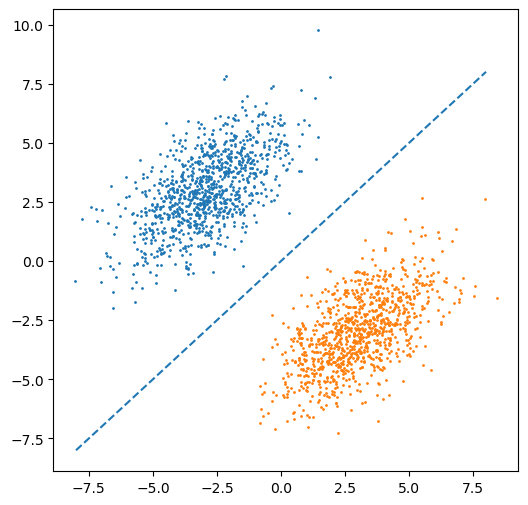

In [6]:
#
# Linearly separable dataset
#
np.random.seed(1)

ang = -45 * np.pi / 180
M = np.array([
    [1.0, 0.0],
    [0.0, 2.0]
]) @ np.array([
    [np.cos(ang), np.sin(ang)],
    [-np.sin(ang), np.cos(ang)]
])
L = 3
x0 = np.random.randn(1000, 2) @ M + np.array([-L, L])
x1 = np.random.randn(1000, 2) @ M + np.array([L, -L])

figure = pl.figure(figsize=(6,6))
ax = figure.add_subplot(1,1,1)
ax.scatter(x0[:, 0], x0[:, 1], s=1)
ax.scatter(x1[:, 0], x1[:, 1], s=1)

#
# Separation
#
ax.plot([-8, 8], [-8, 8], '--')
pl.show()

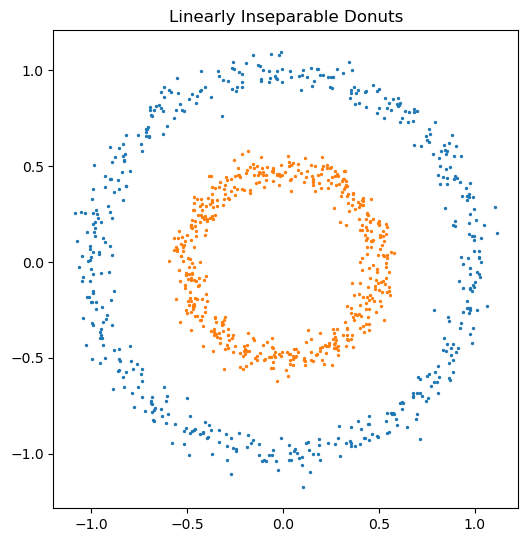

In [16]:
#
# Linearly inseperable dataset
#

import sklearn.datasets

x_donuts, y_donuts = sklearn.datasets.make_circles(1000, noise=0.05, factor=0.5)
x0 = x_donuts[y_donuts == 0]
x1 = x_donuts[y_donuts == 1]

figure = pl.figure(figsize=(6,10))
ax = pl.gca()
ax.scatter(x0[:, 0], x0[:, 1], s=2)
ax.scatter(x1[:, 0], x1[:, 1], s=2)
ax.set_aspect('equal')
ax.set_title('Linearly Inseparable Donuts')
pl.show()

In [18]:
def kernel(x):
    r = np.linalg.norm(x, axis=-1)
    return np.concatenate([x, r[:, None]], axis=-1)
kernel(x_donuts)[:5].round(3)

array([[ 0.123,  0.442,  0.458],
       [-0.18 ,  0.58 ,  0.607],
       [ 0.841,  0.609,  1.038],
       [ 0.281, -0.349,  0.448],
       [-1.   , -0.208,  1.021]])

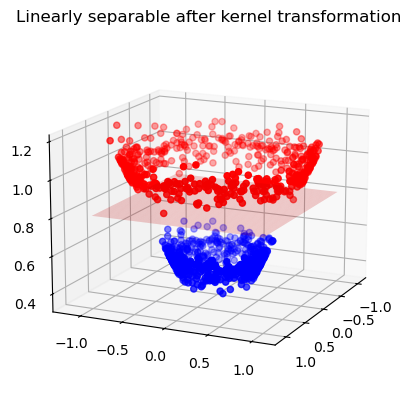

In [19]:
#
# Linear separation in higher dimensions
#

x_new = kernel(x_donuts)
x0_new = x_new[y_donuts == 0]
x1_new = x_new[y_donuts == 1]

fig = pl.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(15, 25)
ax.scatter(x0_new[:,0], x0_new[:,1], x0_new[:,2], c='red')
ax.scatter(x1_new[:,0], x1_new[:,1], x1_new[:,2], c='blue')
ax.set_title('Linearly separable after kernel transformation')

xx, yy = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
z = 0 * xx + 0.8
ax.plot_surface(xx, yy, z, alpha=0.2, color='red');